# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

## Import all the necessary libraries

In [1]:
# Installing the libraries with the specified version.
# !pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats

## Reading the Data into a DataFrame

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [5]:
dataset.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [6]:
dataset.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [7]:
dataset.shape

(100, 6)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [9]:
dataset.isnull().sum()

,0
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


In [10]:
dataset.duplicated().sum()

0

In [11]:
dataset.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [12]:
dataset.describe(include = 'object')

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,old,yes,Spanish
freq,50,50,54,34


In [13]:
dataset.language_preferred.value_counts()

,count
language_preferred,
Spanish,34
French,34
English,32


### Univariate Analysis

In [14]:
categorical_columns = ['group', 'landing_page', 'converted', 'language_preferred']
numerical_columns = ['time_spent_on_the_page']

In [15]:
# Function for distribution of categorical columns
sns.set_style('whitegrid')
def plot_categorical_columns(column_name, title, bar_width=0.2):
    plt.figure(figsize=(5, 3))
    ax = sns.countplot(x=dataset[column_name], hue = dataset[column_name], palette='cool')
    ax.set_title(title)
    ax.set_xlabel(column_name.capitalize().replace('_', ' '))
    ax.set_ylabel('Count')
    plt.show()

Time Spent on the Page

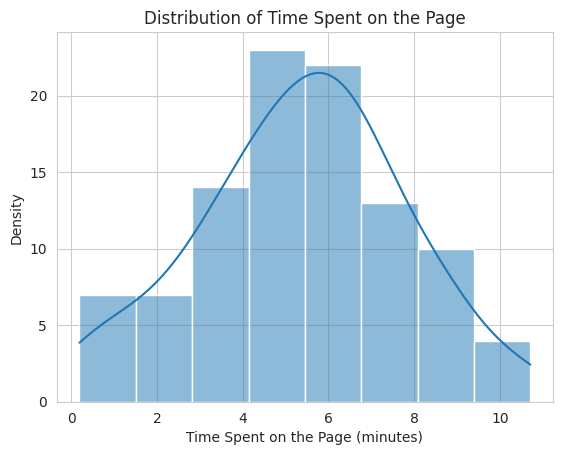

In [16]:
ax = sns.histplot(dataset['time_spent_on_the_page'], kde=True)
ax.set_title('Distribution of Time Spent on the Page')
ax.set_xlabel('Time Spent on the Page (minutes)')
ax.set_ylabel('Density')
plt.show()

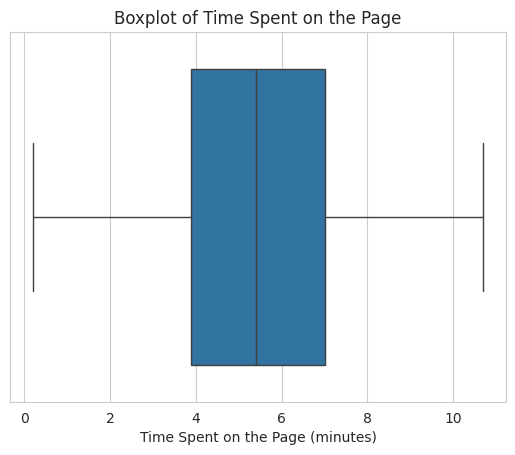

In [17]:
ax = sns.boxplot(x='time_spent_on_the_page', data=dataset)
ax.set_title('Boxplot of Time Spent on the Page')
ax.set_xlabel('Time Spent on the Page (minutes)')
plt.show()

Observations:
1. The peak of the time spent occurs around 5 minutes, suggesting that the average time spent on the page by most users is within this range.
2. The time spent on the page ranges from 0 to around 10 minutes, indicating a wide variety of engagement levels.
3. There are users who spend very little time (close to 0 minutes) and some who spend a considerable amount of time (close to 10 minutes).

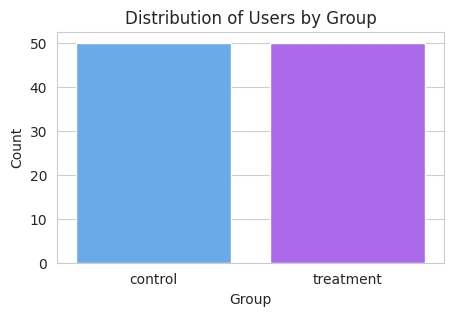

In [18]:
# Analyze the distribution of users in the control and treatment groups
plot_categorical_columns('group', 'Distribution of Users by Group')


Observation: The distribution of users is evenly split between the control and treatment groups.

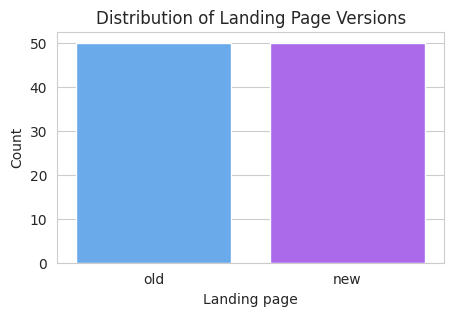

In [19]:
# Analyze the distribution of landing page versions
plot_categorical_columns('landing_page', 'Distribution of Landing Page Versions')

Observation: Similar to group distribution,  The distribution of Landing page is evenly split between the old and new.

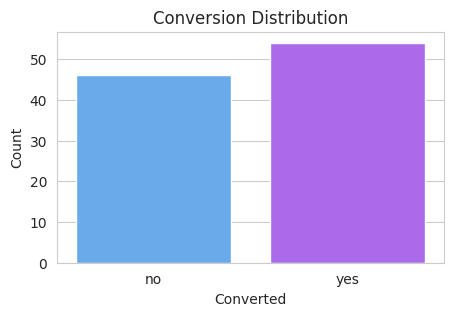

In [20]:
# Analyze the conversions
plot_categorical_columns('converted', 'Conversion Distribution')

Observation:
 The conversion count is higher than no conversions. We understand changes at new page are working, our marketing team will have confidence in promoting new page.

In [21]:
dataset['language_preferred'].value_counts()

,count
language_preferred,
Spanish,34
French,34
English,32


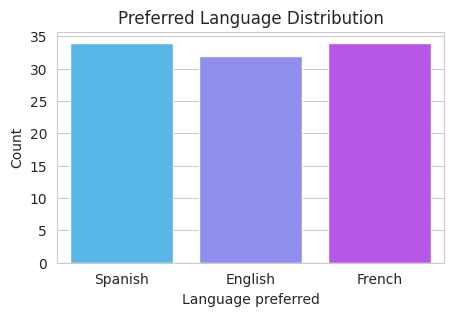

In [22]:
# Analyze the preferred languages of users
plot_categorical_columns('language_preferred', 'Preferred Language Distribution')

Observation:
The most preferred language are Spanish and French followed by English. English is the least preferred among the three but not significantly lower than Spanish and French.

### Bivariate Analysis

Group vs Time Spent on the Page

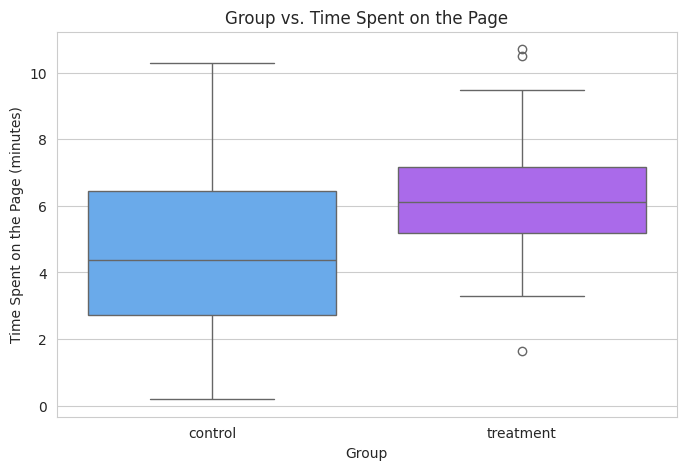

In [23]:
plt.figure(figsize=(8, 5))
ax = sns.boxplot(x='group', y='time_spent_on_the_page', data=dataset, hue = 'group', palette = 'cool')
ax.set_title('Group vs. Time Spent on the Page')
ax.set_xlabel('Group')
ax.set_ylabel('Time Spent on the Page (minutes)')
plt.show()

Observation:
1. The treatment group tends to spend more time on the page compared to the control group. This is evident from the higher median and IQR in the treatment group.
2. The treatment group shows a more consistent engagement, as indicated by the narrower IQR compared to the control group.

Landing Page vs Time Spent on the Page

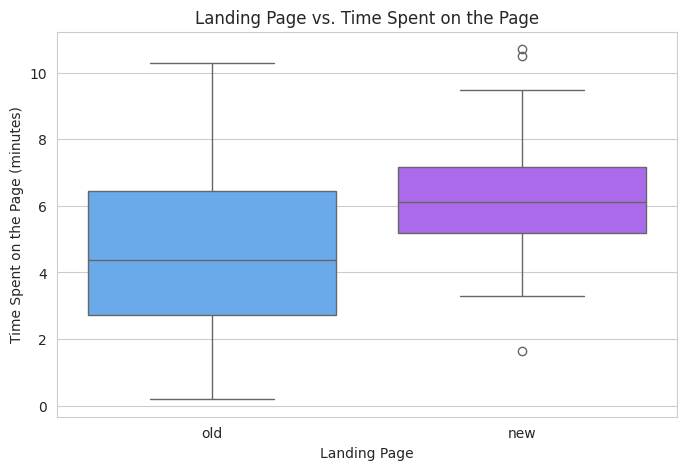

In [24]:
plt.figure(figsize=(8, 5))
ax = sns.boxplot(x='landing_page', y='time_spent_on_the_page', data=dataset, hue = 'landing_page', palette = 'cool')
ax.set_title('Landing Page vs. Time Spent on the Page')
ax.set_xlabel('Landing Page')
ax.set_ylabel('Time Spent on the Page (minutes)')
plt.show()

Observation:
People are spending more time on new page which seems to be engaging.
New page has few outliers while there are no outliers at old page.

Conversion Status vs Time Spent on the Page

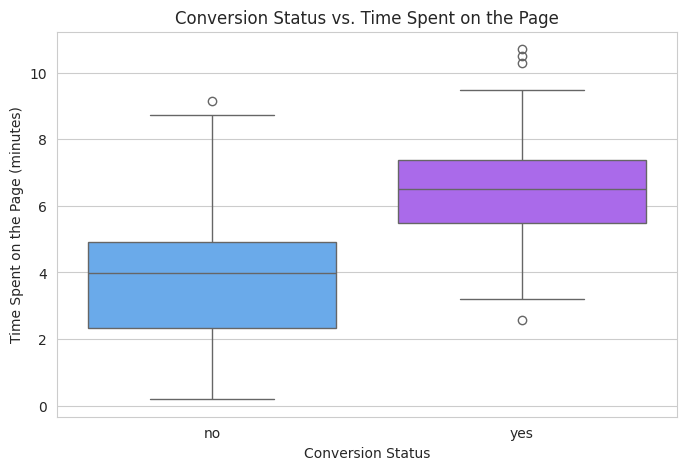

In [25]:
plt.figure(figsize=(8, 5))
ax = sns.boxplot(x='converted', y='time_spent_on_the_page', data=dataset, hue = 'converted', palette = 'cool')
ax.set_title('Conversion Status vs. Time Spent on the Page')
ax.set_xlabel('Conversion Status')
ax.set_ylabel('Time Spent on the Page (minutes)')
plt.show()


Observation: Users who converted (yes) tend to spend more time on the page compared to users who did not convert (no).

Language Preferred vs. Time Spent on the Page

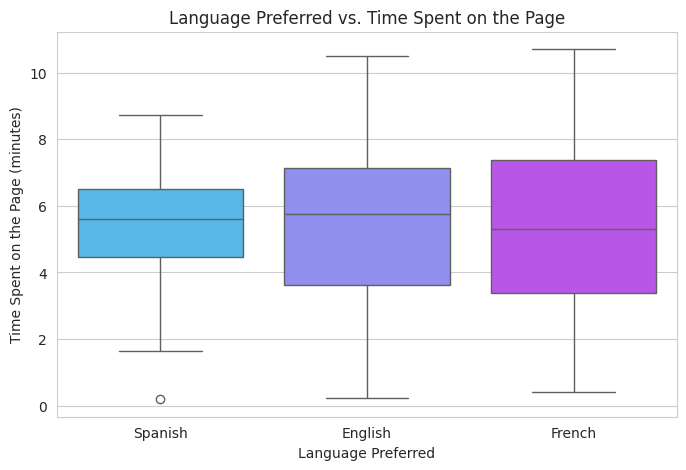

In [26]:
plt.figure(figsize=(8, 5))
ax = sns.boxplot(x='language_preferred', y='time_spent_on_the_page', data=dataset, hue = 'language_preferred', palette = 'cool')
ax.set_title('Language Preferred vs. Time Spent on the Page')
ax.set_xlabel('Language Preferred')
ax.set_ylabel('Time Spent on the Page (minutes)')
plt.show()

Observation: Overall, the time spent on the page is relatively similar across all three language preferences, with median times ranging from 5.5 to 6 minutes. This indicates that language preference does not drastically impact the amount of time users spend on the page.

## 1. Do the users spend more time on the new landing page than the existing landing page?

In [27]:
#To check if the variances on the two pages are the same or different
from scipy.stats import levene
stats, p_value = levene(dataset[dataset['landing_page'] == 'new']['time_spent_on_the_page'],
             dataset[dataset['landing_page'] == 'old']['time_spent_on_the_page'])
print(f'p_value: {p_value}')
print(f'stats: {stats}')

alpha = 0.05
if p_value < alpha:
    print("The variances are significantly different (reject the null hypothesis).")
else:
    print("The variances are not significantly different (fail to reject the null hypothesis).")

p_value: 0.008950671168914447
stats: 7.113724153407544
The variances are significantly different (reject the null hypothesis).


variances on the two pages are different

### Perform Visual Analysis

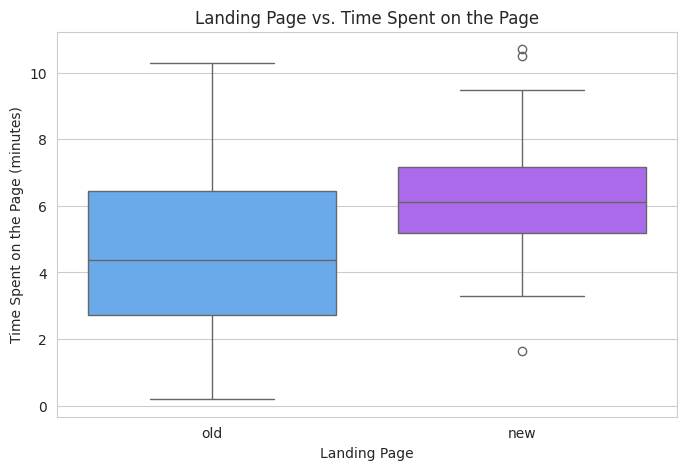

In [28]:
plt.figure(figsize=(8, 5))
ax = sns.boxplot(x='landing_page', y='time_spent_on_the_page', data=dataset, hue = 'landing_page', palette = 'cool')
ax.set_title('Landing Page vs. Time Spent on the Page')
ax.set_xlabel('Landing Page')
ax.set_ylabel('Time Spent on the Page (minutes)')
plt.show()

Observation: people spend more time on new page

### Step 1: Define the null and alternate hypotheses

H0 = Users spend same or less time on the new landing page compared to existing landing page.
H1 = Users spend more time on the new landing page than the existing landing page

### Step 2: Select Appropriate test

We will use one-tailed t test, positive side unidirectional, concerning two sample means from two independent populations. The population standard deviations are unknown.

### Step 3: Decide the significance level

alpha  = 0.05



### Step 4: Collect and prepare data

In [29]:
time_spent_new_page = dataset[dataset['landing_page'] == 'new']['time_spent_on_the_page']
time_spent_old_page = dataset[dataset['landing_page'] == 'old']['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [30]:
from scipy.stats import ttest_ind
stats, p_value = ttest_ind(time_spent_new_page, time_spent_old_page, alternative = 'greater', equal_var=False)
print(f'p_value: {p_value}')
print(f'stats: {stats}')

p_value: 0.0001392381225166549
stats: 3.7867702694199856


### Step 6: Compare the p-value with $\alpha$

In [31]:
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


### Step 7:  Draw inference

Based on the hypothesis test, we have sufficient evidence to conclude that users do indeed spend more time on the new landing page compared to the existing one. This suggests that the new landing page may be more engaging or effective in retaining users' attention and may convert them potential customers.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

In [32]:
contingency_table = pd.crosstab(dataset['landing_page'], dataset['converted'], normalize = 'index')
contingency_table

converted,no,yes
landing_page,,
new,0.34,0.66
old,0.58,0.42


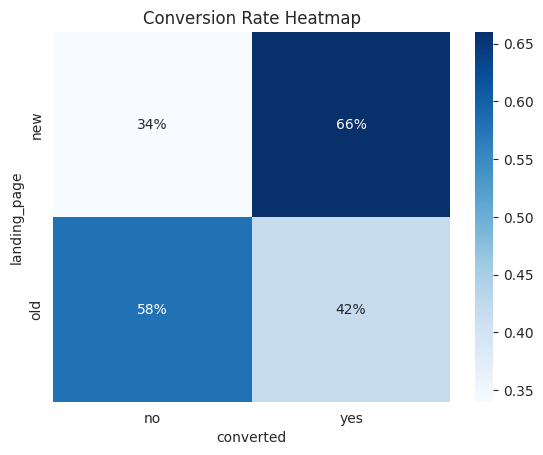

In [33]:
sns.heatmap(contingency_table, annot=True, fmt='.0%', cmap='Blues', vmin = 0.34, vmax = 0.66)
plt.title('Conversion Rate Heatmap')
plt.show()

Observation: conversions on new page are higher (66%) while conversions on old page are less (42%)

In [34]:
H0 = 'The conversion rate for the new page is equal to or less than the conversion rate for the old page.'
H1 = 'The conversion rate for the new page is greater than the conversion rate for the old page.'

As we are testing proportions, we can select proportions ztest to test our null hypothesis

In [35]:
alpha = 0.05

In [36]:
new_page_conversion = dataset[dataset['landing_page'] == 'new']['converted'].value_counts()['yes']
old_page_conversion = dataset[dataset['landing_page'] == 'old']['converted'].value_counts()['yes']
n_new_landing = dataset.landing_page.value_counts()['new']
n_old_landing = dataset.landing_page.value_counts()['old']
print('The number of conversion on new page is:' , new_page_conversion)
print('The number of conversion on old page is:' , old_page_conversion)
n_new_landing, n_old_landing

The number of conversion on new page is: 33
The number of conversion on old page is: 21


(50, 50)

In [37]:
from statsmodels.stats.proportion import proportions_ztest
stats, p_value = proportions_ztest([new_page_conversion, old_page_conversion], [n_new_landing,n_old_landing], alternative = 'larger')
print(f'p_value: {p_value}')
print(f'stats: {stats}')

p_value: 0.008026308204056278
stats: 2.4077170617153842


In [38]:
if p_value < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


Since p-value (0.0080) is less than the significance level (0.05), we reject the null hypothesis. This means we have sufficient evidence to conclude that the conversion rate for the new landing page is higher than the conversion rate for the old landing page.

## 3. Is the conversion and preferred language are independent or related?

In [39]:
crosstab = pd.crosstab(dataset['converted'], dataset['language_preferred'])
crosstab

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


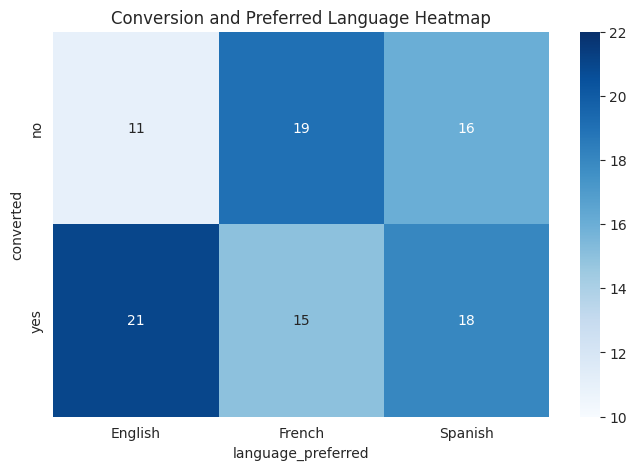

In [40]:
plt.figure(figsize=(8, 5))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues', vmax = 22, vmin = 10)
plt.title('Conversion and Preferred Language Heatmap')
plt.show()

Observations:
1. The higher conversion rate for English speakers might suggest that the marketing messages or the content is more effectively communicated in English. This could be due to various reasons such as better localization, more compelling offers, or a stronger connection with English-speaking users.
2. Lower conversion rates in French and Spanish opens scope of deeper analysis and improvement

H0 = conversion and preferred language are independent to each other,
H1 = conversion and preferred language are related to each other

To test the independence of two categorical variables, we can use the chi-squared test of independence.

In [41]:
alpha = 0.05

In [42]:
crosstab = pd.crosstab(dataset['converted'], dataset['language_preferred'])
crosstab

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [43]:
from scipy.stats import chi2_contingency
stats, p_value, dof, expected = chi2_contingency(crosstab)
print(f'p_value: {p_value}')
print(f'stats: {stats}')
print(f'degree of freedom: {dof}')
print(f'expected: {expected}')

p_value: 0.21298887487543447
stats: 3.0930306905370837
degree of freedom: 2
expected: [[14.72 15.64 15.64]
 [17.28 18.36 18.36]]


In [44]:
if p_value < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Fail to reject the null hypothesis


The chi-square test of independence suggests that there is no significant association between conversion and preferred language, indicating that users' conversion behavior is independent of their language preference.

## 4. Is the time spent on the new page same for the different language users?

In [45]:
new_page_users = dataset[dataset['landing_page'] == 'new']
new_page_users.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


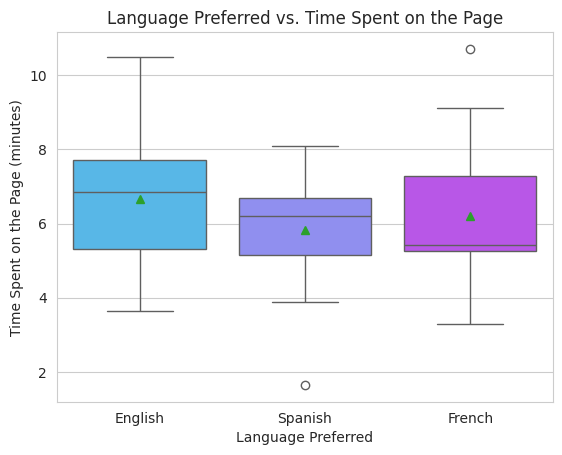

In [46]:
ax = sns.boxplot(x='language_preferred', y='time_spent_on_the_page', data=new_page_users, hue = 'language_preferred', palette = 'cool', showmeans = True)
ax.set_title('Language Preferred vs. Time Spent on the Page')
ax.set_xlabel('Language Preferred')
ax.set_ylabel('Time Spent on the Page (minutes)')
plt.show()

In [47]:
new_page_users.groupby('language_preferred')['time_spent_on_the_page'].mean().round(2)

,time_spent_on_the_page
language_preferred,
English,6.66
French,6.20
Spanish,5.84


Time spent by different language users are almost same

H0 = Time spent by different language groups is same on new page,
H1 = At least one language group has a different mean time spent on the new landing page.

This is a problem, concerning three sample means, one way ANOVA test can test time spent by different language users.

In [48]:
alpha = 0.05

In [49]:
from scipy.stats import f_oneway
stats, p_value = f_oneway(new_page_users[new_page_users['language_preferred'] == 'English']['time_spent_on_the_page'],
                                 new_page_users[new_page_users['language_preferred'] == 'French']['time_spent_on_the_page'],
                                 new_page_users[new_page_users['language_preferred'] == 'Spanish']['time_spent_on_the_page'])

print(f'p_value: {p_value}')
print(f'stats: {stats}')

p_value: 0.43204138694325955
stats: 0.8543992770006822


In [50]:
if p_value < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Fail to reject the null hypothesis


Observation:
Based on the ANOVA test, there is no statistically significant difference in the time spent on the new page among different language users.
This indicates that language preference does not significantly affect the amount of time users spend on the new landing page.

## Conclusion and Business Recommendations

Conclusions:

1. Time Spent on the New Landing Page: Users spend more time on new landing page compared to old landing page.
2. Conversion Rates: Conversion rate for the new landing page is significantly higher than old landing page.
3. Independence of Conversion and Preferred Language: There is no significant association between conversion rates and preferred language, indicating that conversion behavior is independent of language preference.
4. Time Spent and Language Preference: Mean time spent on the new landing page does not significantly differ across users with different language preferences.

Business Recommendations:

1. Continue Using the New Landing Page:
Given that the new landing page results in both higher user engagement (more time spent) and higher conversion rates, it is recommended to continue using the new landing page as the primary landing page.
2. Continuous Improvement: As new landing page is more engaing and attracting higher conversions, its recommneded to continue improvement at new landing page.
3. Further Segmentation and Personalization: Other factors can be considered like age, sex, region etc.
4. Content Localization and Personalization: Even though conversion rates and time spent are not significantly impacted by language preference, it's still important to ensure that content is well-localized and tailored for different language groups to maintain a positive user experience.

___